<a href="https://colab.research.google.com/github/pranavkrish2005/Stock-prediction-AI/blob/main/StockPredictionSPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import datetime
from datetime import timedelta

yf.pdr_override()


from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers


In [ ]:
df = pdr.get_data_yahoo('SPY','2020-01-01','2023-10-01')
df.reset_index(inplace=True)
df

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,323.540009,324.890015,322.529999,324.869995,306.295258,59151200
1,2020-01-03,321.160004,323.640015,321.100006,322.410004,303.975861,77709700
2,2020-01-06,320.489990,323.730011,320.359985,323.640015,305.135590,55653900
3,2020-01-07,323.019989,323.540009,322.239990,322.730011,304.277710,40496400
4,2020-01-08,322.940002,325.779999,322.670013,324.450012,305.899292,68296000
...,...,...,...,...,...,...,...
938,2023-09-25,429.170013,432.269989,428.720001,432.230011,432.230011,70874500
939,2023-09-26,429.089996,429.820007,425.019989,425.880005,425.880005,96168400
940,2023-09-27,427.089996,427.670013,422.290009,426.049988,426.049988,104705800
941,2023-09-28,425.480011,430.250000,424.869995,428.519989,428.519989,92258300


In [ ]:
df = df[['Date', 'Close']]
df['Date']

0     2020-01-02
1     2020-01-03
2     2020-01-06
3     2020-01-07
4     2020-01-08
         ...    
938   2023-09-25
939   2023-09-26
940   2023-09-27
941   2023-09-28
942   2023-09-29
Name: Date, Length: 943, dtype: datetime64[ns]

In [ ]:
df['Date'] = pd.to_datetime(df['Date']);
df['Date']

<ipython-input-32-1e2c1b46e6e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date']);


0     2020-01-02
1     2020-01-03
2     2020-01-06
3     2020-01-07
4     2020-01-08
         ...    
938   2023-09-25
939   2023-09-26
940   2023-09-27
941   2023-09-28
942   2023-09-29
Name: Date, Length: 943, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
2020-01-02,324.869995
2020-01-03,322.410004
2020-01-06,323.640015
2020-01-07,322.730011
2020-01-08,324.450012
...,...
2023-09-25,432.230011
2023-09-26,425.880005
2023-09-27,426.049988


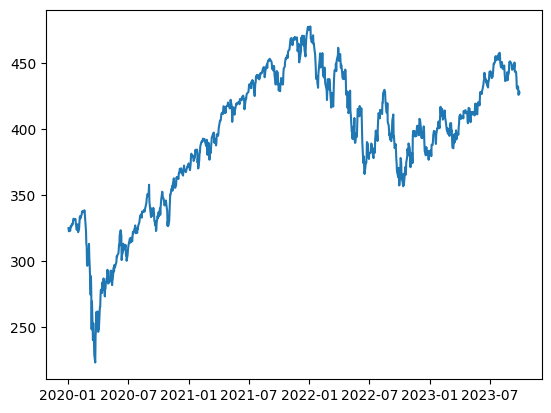

In [ ]:
plt.plot(df.index, df['Close'])

In [ ]:

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = datetime.strptime(first_date_str, '%Y-%m-%d')
  last_date  = datetime.strptime(last_date_str, '%Y-%m-%d')

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2020-03-25',
                                '2023-03-23',
                                n=5)
windowed_df

,Target Date,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2020-03-25,240.000000,240.509995,228.800003,222.949997,243.149994,246.789993
1,2020-03-26,240.509995,228.800003,222.949997,243.149994,246.789993,261.200012
2,2020-03-27,228.800003,222.949997,243.149994,246.789993,261.200012,253.419998
3,2020-03-30,222.949997,243.149994,246.789993,261.200012,253.419998,261.649994
4,2020-03-31,243.149994,246.789993,261.200012,253.419998,261.649994,257.750000
...,...,...,...,...,...,...,...
750,2023-03-17,385.910004,385.359985,391.730011,389.279999,396.109985,389.989990
751,2023-03-20,385.359985,391.730011,389.279999,396.109985,389.989990,393.739990
752,2023-03-21,391.730011,389.279999,396.109985,389.989990,393.739990,398.910004
753,2023-03-22,389.279999,396.109985,389.989990,393.739990,398.910004,392.109985


In [ ]:
def windowed_df_to_date_X_y(windowed_df) :
  df_as_np = windowed_df.to_numpy()

  dates = df_as_np[:, 0]
  input_matrix = df_as_np[:, 1:-1]
  # the last parameter is 1 because we are doing unit variant forecasting
  X = input_matrix.reshape((len(dates), input_matrix.shape[1], 1))

  y = df_as_np[:, -1]

  return dates, X.astype(np.float32), y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((755,), (755, 5, 1), (755,))

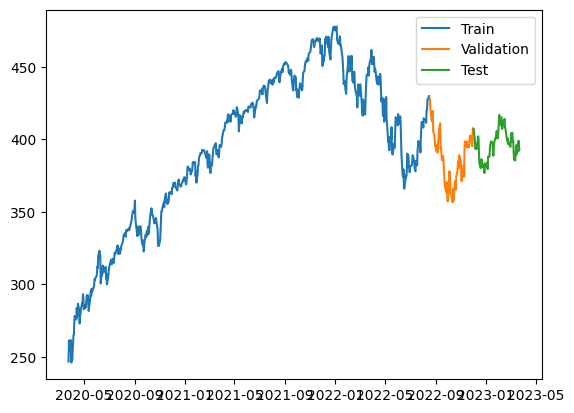

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
model = Sequential([layers.Input((5, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
19/19 [==============================] - 4s 39ms/step - loss: 156551.5625 - mean_absolute_error: 391.8121 - val_loss: 149173.8281 - val_mean_absolute_error: 385.8278
Epoch 2/100
19/19 [==============================] - 0s 9ms/step - loss: 155273.6094 - mean_absolute_error: 390.1779 - val_loss: 147762.1562 - val_mean_absolute_error: 383.9940
Epoch 3/100
19/19 [==============================] - 0s 8ms/step - loss: 153142.7344 - mean_absolute_error: 387.4243 - val_loss: 144368.8281 - val_mean_absolute_error: 379.5496
Epoch 4/100
19/19 [==============================] - 0s 9ms/step - loss: 148327.7656 - mean_absolute_error: 381.1703 - val_loss: 138335.4375 - val_mean_absolute_error: 371.5167
Epoch 5/100
19/19 [==============================] - 0s 10ms/step - loss: 140550.7500 - mean_absolute_error: 370.8839 - val_loss: 128062.1875 - val_mean_absolute_error: 357.4232
Epoch 6/100
19/19 [==============================] - 0s 8ms/step - loss: 128150.5938 - mean_absolute_error: 353.6

19/19 [==============================] - 1s 5ms/step


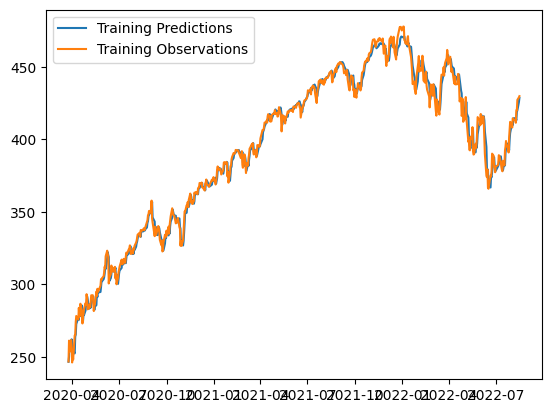

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

In [ ]:
val_predictions = model.predict(X_val).flatten()
y_val
# plt.plot(dates_val, val_predictions)
# plt.plot(dates_val, y_val)
# plt.legend(['Validation Predictions', 'Validation Observations'])

3/3 [==============================] - 0s 9ms/step


array([426.65, 427.89, 422.14, 413.35, 412.35, 413.67, 419.51, 405.31,
       402.63, 398.21, 395.18, 396.42, 392.24, 390.76, 397.78, 400.38,
       406.6 , 410.97, 393.1 , 394.6 , 390.12, 385.56, 388.55, 384.09,
       377.39, 374.22, 367.95, 364.31, 363.38, 370.53, 362.79, 357.18,
       366.61, 377.97, 377.09, 373.2 , 362.79, 360.02, 357.74, 356.56,
       365.97, 357.63, 366.82, 371.13, 368.5 , 365.41, 374.29, 378.87,
       384.92, 382.02, 379.98, 389.02, 386.21, 384.52, 374.87, 371.01,
       376.35, 379.95, 382.  , 374.13, 394.69, 398.51, 395.12, 398.49,
       395.45, 394.24, 396.03, 394.59, 399.9 , 402.42, 402.33, 395.91,
       395.23, 407.68, 407.38], dtype=float32)

3/3 [==============================] - 0s 6ms/step


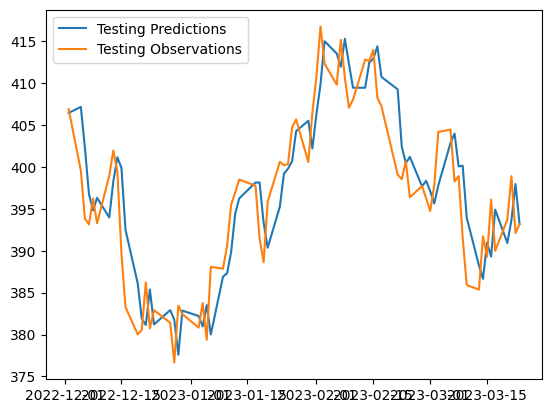

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
# Calculating percent accuracy
absolute_percentage_error = np.abs((y_test - test_predictions) / y_test) * 100

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = np.mean(absolute_percentage_error)

# Calculate the percent accuracy
percent_accuracy = 100 - mape

print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))
print("Percent Accuracy: {:.2f}%".format(percent_accuracy))


Mean Absolute Percentage Error (MAPE): 0.98%
Percent Accuracy: 99.02%


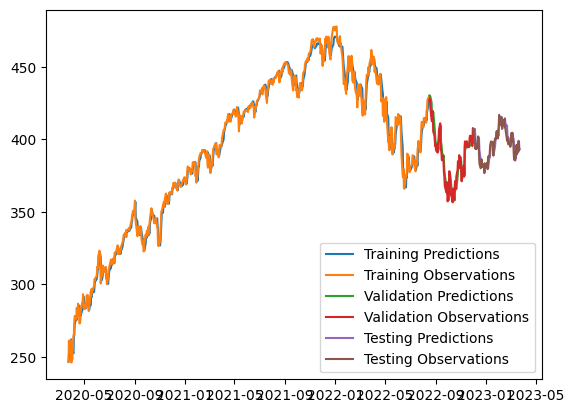

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])